In this post, I solved several functional diversity index

- community weighted mean
- functional dispersion
- Rao's index
- Temporal beta diversity (dissimilarity)
- Functional over-redudancy

# functional dispersion

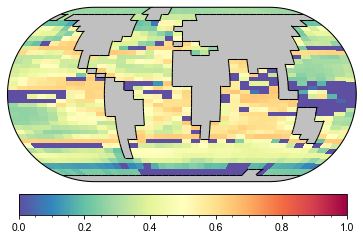

In [45]:
from cgeniepy.core import GenieModel as gm
from cgeniepy.utils import distance
mod_pi = gm("../model/8P7Z4F_dev_spinup")

sum_biomass = mod_pi.foram_biomass()

# weight (defined as relative abundance in LALIBERTE and LEGENDRE, 2010)
# (0, 0)
w1 = mod_pi.select_foram("bn").biomass_c().proportion()
# (0, 1)
w2 = mod_pi.select_foram("bs").biomass_c().proportion()
# (0.5, 1)
w3 = mod_pi.select_foram("sn").biomass_c().proportion()
# (1, 1)
w4 = mod_pi.select_foram("ss").biomass_c().proportion()

# centroid x,y
cent_x = mod_pi.cwm(trait="symbiont", abundance="relative")
cent_y = mod_pi.cwm(trait="spine", abundance="relative")

# each group's distance to centroid
d1 = distance(cent_x, cent_y)
d2 = distance(cent_x, cent_y - 1)
d3 = distance(cent_x - 0.5, cent_y)
d4 = distance(cent_x - 1, cent_y - 1)

# weighted sum/abundance sum
fdis_pi = (w1*d1 + w2*d2 + w3*d3 + w4*d4)/1
fdis_pi.plot_map(vmax=1)

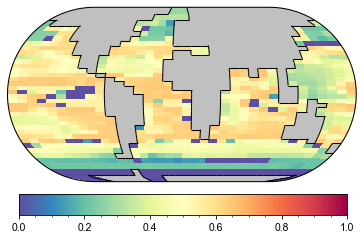

In [46]:
mod_lgm = gm("../model/LGM_8P7Z4F")

sum_biomass = mod_pi.foram_biomass()

# weight (defined as relative abundance in LALIBERTE and LEGENDRE, 2010)
# (0, 0)
w1 = mod_lgm.select_foram("bn").biomass_c().proportion()
# (0, 1)
w2 = mod_lgm.select_foram("bs").biomass_c().proportion()
# (0.5, 1)
w3 = mod_lgm.select_foram("sn").biomass_c().proportion()
# (1, 1)
w4 = mod_lgm.select_foram("ss").biomass_c().proportion()

# centroid x,y
cent_x = mod_lgm.cwm(trait="symbiont", abundance="relative")
cent_y = mod_lgm.cwm(trait="spine", abundance="relative")

# each group's distance to centroid
d1 = distance(cent_x, cent_y)
d2 = distance(cent_x, cent_y - 1)
d3 = distance(cent_x - 0.5, cent_y)
d4 = distance(cent_x - 1, cent_y - 1)

# weighted sum/abundance sum
fdis_lgm = (w1*d1 + w2*d2 + w3*d3 + w4*d4)/1
fdis_lgm.plot_map(vmax=1)

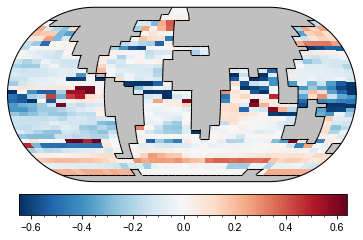

In [47]:
(fdis_pi - fdis_lgm).plot_map()

# Rao's index for modern and LGM

In [48]:
import numpy as np
from cgeniepy.core import GenieArray
# trait dictionary
tr_dict = {"bn": np.array([0, 0]),
           "bs": np.array([0, 1]),
           "sn": np.array([0.5, 1]),
           "ss": np.array([1, 1])
           }

# Rao's entrophy index
rao_pi = GenieArray()
for i in ["bn", "bs", "sn", "ss"]:
    for j in ["bn", "bs", "sn", "ss"]:
        if i != j:
            # weight (relative abundance/biomass)
            x = mod_pi.select_foram(i).biomass_c().proportion()
            y = mod_pi.select_foram(i).biomass_c().proportion()
            # distance
            m = tr_dict[i]
            n = tr_dict[j]
            d = np.sqrt(np.sum(np.square(m - n)))
            # weighted distance
            wd = x*y*d
            rao_pi += wd
        else:
            pass

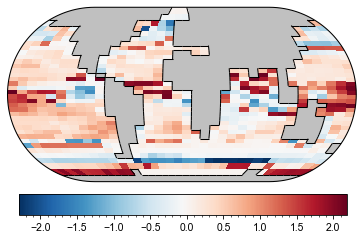

In [49]:
import numpy as np
from cgeniepy.core import GenieArray
# trait dictionary
tr_dict = {"bn": np.array([0, 0]),
           "bs": np.array([0, 1]),
           "sn": np.array([0.5, 1]),
           "ss": np.array([1, 1])
           }

# Rao's entrophy index
rao_lgm = GenieArray()
for i in ["bn", "bs", "sn", "ss"]:
    for j in ["bn", "bs", "sn", "ss"]:
        if i != j:
            # weight (relative abundance/biomass)
            x = mod_lgm.select_foram(i).biomass_c().proportion()
            y = mod_lgm.select_foram(i).biomass_c().proportion()
            # distance
            m = tr_dict[i]
            n = tr_dict[j]
            d = np.sqrt(np.sum(np.square(m - n)))
            # weighted distance
            wd = x*y*d
            rao_lgm += wd
        else:
            pass

(rao_pi - rao_lgm).plot_map()

# LGM - modern distance

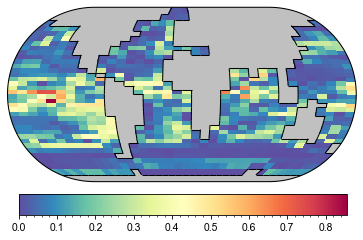

In [50]:
from cgeniepy.core import GenieArray

mod_pi = gm("../model/8P7Z4F_dev_spinup")
mod_lgm = gm("../model/LGM_8P7Z4F")

# LGM to modern dissimilarity (distance between centroid)
cent_xm = mod_pi.cwm(trait="symbiont")
cent_ym = mod_pi.cwm(trait="spine")

cent_xl = mod_lgm.cwm(trait="symbiont")
cent_yl = mod_lgm.cwm(trait="spine")

d = distance(cent_xm - cent_xl, cent_ym - cent_ym)
x = GenieArray()
x.array = d
x.plot_map()

# modern has more specialised species and higher FD